<a href="https://colab.research.google.com/github/soyounson/TIL_pytorch/blob/main/00_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#선형회귀모델 신경망 w/ pytorch

In [42]:
###################
# load modules 
###################
import torch 
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

##데이터 생성 및 회귀식 설정

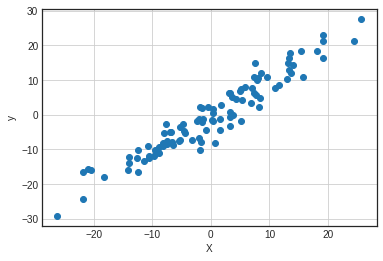

In [43]:
###################
# Dataset
###################
#..... 100개의 random #
X = torch.randn(100,1)*10
y = X + 3*torch.randn(100,1)
#..... visualize datasets
plt.plot(X.numpy(),y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y') 
plt.grid()
plt.show()

##신경망 구성 

pytorch에서는 class를 define해줌

In [44]:
class LinearRegressionModel(nn.Module): # module상속받음

 # layers 구성 
  def __init__(self):
    super(LinearRegressionModel,self).__init__()   
    self.linear = nn.Linear(1,1) #linear layer만들어줌

# 전체 architecture 
  def forward(self,x):
    pred = self.linear(x)
    return pred

##모델생성 및 파라미터 확인


> **torch.manual_seed**       
DL에서는 random num을 사용하는 경우가 많음 (초기화시)
pytorch에서는 random seed를 고정하기위한 함수로 manual_seed 제공 

ref           
[1] https://rabo0313.tistory.com/96               
[2] https://hoya012.github.io/blog/reproducible_pytorch/

In [45]:
torch.manual_seed(111)   # 이건뭐지?
#..... 모델 
model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [46]:
#..... 구성되어 있는 파라미터 값들 확인 
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


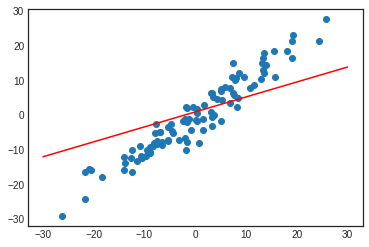

In [47]:
#..... weight, bias 값 갖고올것 
w, b = model.parameters()
def get_params():
  return w[0][0].item(), b[0].item()

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  #..... 학습 전 initial model 
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.show()

plot_fit('Initial Model')

##손실함수와 옵티마이져

In [48]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

##모델학습

In [49]:
epochs = 100
#..... loss 저장하게 list로 만듦
losses = []
for epoch in range(epochs):
  #..... 일단 매개변수들을 0으로 만듦
  optimizer.zero_grad()
  
  #.....예측값
  y_pred = model(X)
  #..... loss값 만들기 
  loss = criterion(y_pred,y)
  #..... loss에 append시킴
  losses.append(loss)
  loss.backward()

  optimizer.step()

  if epoch %10 == 0:
    print('Epoch : {:3d}\tloss: {:.4f}'.format(epoch+1,loss))

Epoch :   1	loss: 47.0144
Epoch :  11	loss: 11.3691
Epoch :  21	loss: 11.1018
Epoch :  31	loss: 11.0481
Epoch :  41	loss: 10.9977
Epoch :  51	loss: 10.9493
Epoch :  61	loss: 10.9028
Epoch :  71	loss: 10.8581
Epoch :  81	loss: 10.8151
Epoch :  91	loss: 10.7739


##시각화

In [40]:
#plt.plot(range(epochs),losses)
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.show() 

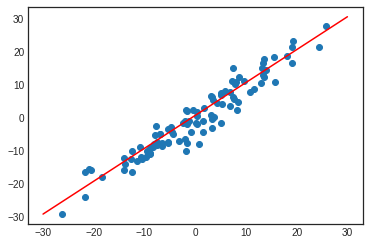

In [50]:
plot_fit('Trained Model')